# Demo: Getting the data stock daily update by using the yfinance library
In this demo of code we use the yfinance library to obtain the daily update data stock.
There are some package we will get in touch with:
-   pandas
-   yfinance
-   datatime
-   bs4
-   requests

In [43]:
# import package
import pandas as pd
from datetime import datetime
from dateutil.relativedelta import relativedelta
import requests
from bs4 import BeautifulSoup
import yfinance

In [44]:
# Getting most n famous tickers: Company Name, Company Code
n_tickers = 10
html = requests.get('https://companiesmarketcap.com/tech/largest-tech-companies-by-market-cap/').text
soup = BeautifulSoup(html, 'html.parser')
companyName = [x.get_text(strip=True) for x in soup.find_all('div', {'class': 'company-name'})][:n_tickers]
companyCode = [x.get_text(strip=True) for x in soup.find_all('div', {'class': 'company-code'})][:n_tickers]

In [45]:
print(companyCode)

['AAPL', 'MSFT', 'GOOG', 'AMZN', 'NVDA', 'META', 'TSLA', 'TSM', 'AVGO', 'TCEHY']


In [46]:
print(companyName)

['Apple', 'Microsoft', 'Alphabet (Google)', 'Amazon', 'NVIDIA', 'Meta Platforms (Facebook)', 'Tesla', 'TSMC', 'Broadcom', 'Tencent']


In [47]:
# Getting stock data of Company Name: TSMC with Company Code: TSM
"""
-   start_date: start time to getting data stock
-   end_data: end time to getting data stock
-   data_source: where to getting data
"""
now = datetime.now()
data_source = 'yahoo'
start_date = now.today() - relativedelta(years  = 5)
end_date = now.today()
print(start_date)
print(end_date)
df_TSM = yfinance.download("TSM",start=start_date,end=end_date)

2018-11-10 10:21:43.664990
2023-11-10 10:21:43.665149
[*********************100%%**********************]  1 of 1 completed


# Exploring the data:
-   Type of data in python
-   Metadata information
-   Simple statistics of data
-   Visualize data

In [48]:
# Type of data after getting from yfinance:
print(type(df_TSM))

<class 'pandas.core.frame.DataFrame'>


The type of data after getting from yfinance is DataFrame type in Pandas library

In [49]:
# Data info:
df_TSM.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2018-11-12 to 2023-11-09
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1257 non-null   float64
 1   High       1257 non-null   float64
 2   Low        1257 non-null   float64
 3   Close      1257 non-null   float64
 4   Adj Close  1257 non-null   float64
 5   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.7 KB


There are 6 features for each row:
-   One row is data for one day
-   Each day: 
    -   Open: The price when the market opened in the morning
    -   High: The highest price during that trading day
    -   Low: The lowest price duing that trading day.
    -   Close: The price when the market closed in the afternoon
    -   Adj Close: A price adjusted to make prices comparable over time
    -   Volumn: Number of shares of the stock traded that day.

In [50]:
# Data simple statistics:
df_TSM.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,81.663763,82.568616,80.686842,81.606110,78.096290,1.006594e+07
std,29.015109,29.363094,28.536629,28.913801,28.817504,5.112403e+06
min,34.459999,35.029999,34.209999,34.360001,30.349722,2.320500e+06
25%,53.500000,53.790001,52.939999,53.290001,49.265480,6.830300e+06
50%,86.000000,86.889999,85.019997,86.059998,83.854927,8.977400e+06
75%,105.769997,106.720001,104.419998,105.559998,103.074684,1.179240e+07
max,141.610001,145.000000,139.419998,140.660004,135.699219,6.079320e+07


Read result in Open column:
-   count: number of samples (items,...)
-   mean: Average values of open values column
-   std: Standar deviation of open values column
-   min:  Minimal open values
-   25%: price_value -> P(open_value $\leq$ price_value) = 0.25 (The probability of open value less than or equal p1 is 0.25)
-   50%, 75%, similarly 25%
-   max: Maximal open values

In [51]:
# Showing first ten rows in our dataframe
df_TSM.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-12,37.860001,37.919998,37.009998,37.060001,32.734589,11666700
2018-11-13,37.389999,38.119999,37.240002,37.400002,33.034904,15057100
2018-11-14,38.200001,38.340000,37.369999,37.840000,33.423557,10404900
2018-11-15,38.070000,38.570000,37.889999,38.520000,34.024189,10840400
2018-11-16,37.070000,37.200001,36.660000,36.869999,32.566769,16382400
2018-11-19,36.639999,36.680000,35.959999,36.049999,31.842464,15191700
2018-11-20,35.400002,35.990002,35.220001,35.639999,31.480324,11673500
2018-11-21,36.419998,36.720001,36.139999,36.169998,31.948469,7013100
2018-11-23,35.830002,36.200001,35.750000,35.959999,31.762968,2320500


In [52]:
df_TSM["Y_price"] = (df_TSM["Open"] + df_TSM["Close"])/2
df_TSM["Y_error"] = (df_TSM["Open"] - df_TSM["Close"]).abs()/2
df_TSM["HL"] = (df_TSM["High"] + df_TSM["Low"])/2
df_TSM["HL_error"] = (df_TSM["High"] - df_TSM["Low"]).abs()/2
df_TSM["IsPositive"] = df_TSM["Close"] >= df_TSM["Open"]

In [53]:
df_TSM.head()

,Open,High,Low,Close,Adj Close,Volume,Y_price,Y_error,HL,HL_error,IsPositive
Date,,,,,,,,,,,
2018-11-12,37.860001,37.919998,37.009998,37.060001,32.734589,11666700,37.460001,0.400000,37.464998,0.455000,False
2018-11-13,37.389999,38.119999,37.240002,37.400002,33.034904,15057100,37.395000,0.005001,37.680000,0.439999,True
2018-11-14,38.200001,38.340000,37.369999,37.840000,33.423557,10404900,38.020000,0.180000,37.855000,0.485001,False
2018-11-15,38.070000,38.570000,37.889999,38.520000,34.024189,10840400,38.295000,0.225000,38.230000,0.340000,True
2018-11-16,37.070000,37.200001,36.660000,36.869999,32.566769,16382400,36.969999,0.100000,36.930000,0.270000,False


In [54]:
plot_df_TSM = df_TSM.tail(100)

In [55]:
plot_df_TSM["IsPositive"]

Date
2023-06-21    False
2023-06-22     True
2023-06-23     True
2023-06-26    False
2023-06-27     True
              ...  
2023-11-03     True
2023-11-06     True
2023-11-07     True
2023-11-08    False
2023-11-09    False
Name: IsPositive, Length: 100, dtype: bool

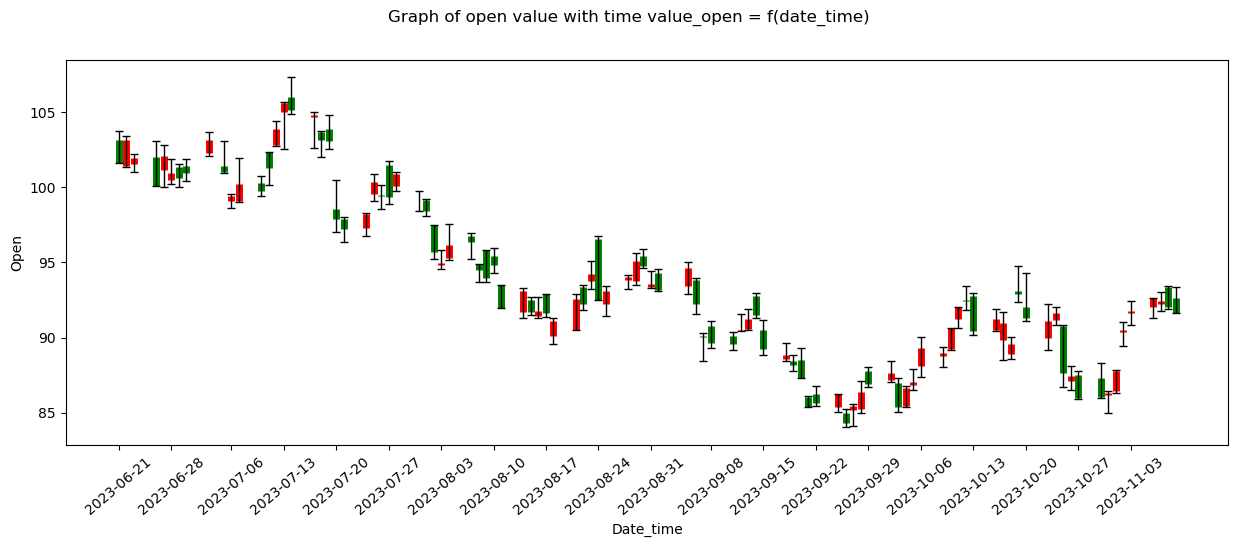

In [60]:
# Visualize data
# Plot graph of time-series data type
from matplotlib import pyplot as plt
import matplotlib

colors = {True:'red',False:'green'}

fig, ax = plt.subplots(1,1,figsize = (15,5))
# ax.plot(plot_df_TSM.index.tolist(),plot_df_TSM["Open"],color='g')
# ax.plot(plot_df_TSM.index.tolist(),plot_df_TSM["Close"],color='red')
ax.errorbar(plot_df_TSM.index.tolist(),
            plot_df_TSM["Y_price"],
            plot_df_TSM["Y_error"],
            linewidth = 5, 
            capsize=0,
            ls='none',
            ecolor = plot_df_TSM['IsPositive'].map(colors))
ax.errorbar(plot_df_TSM.index.tolist(),plot_df_TSM["HL"],plot_df_TSM["HL_error"],linewidth = 1, capsize=3,color='k',ls='none')
fig.suptitle("Graph of open value with time value_open = f(date_time)")
ax.set_xlabel("Date_time")
ax.set_ylabel("Open")
ax.set_xticks(plot_df_TSM.index.tolist()[::5]) #Without this it is too dense, with this we only display every after 60 xticks
ax.set_xticklabels(ax.get_xticklabels(),rotation = 40, ha = 'center')# Shearing the labels to 40 degree and write it in center
plt.show()